In [0]:
# !pip install torchaudio
import torchaudio
from torchaudio.transforms import MelSpectrogram

import torch
import numpy as np
import matplotlib.pyplot as plt

First we load the audio. The audio was recorded at a certain sample rate, in our case 16 Khz. The waveform tensor consists the sampled values.

In [35]:
waveform, sample_rate = torchaudio.load('/content/audio.flac')
print("sample rate:", sample_rate)
print(waveform.shape)

sample rate: 16000
torch.Size([1, 225360])


x.shape torch.Size([1, 128, 1127])


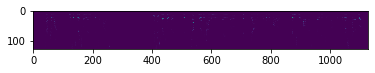

In [18]:
specgram = MelSpectrogram()
x = specgram(waveform)
plt.imshow(x[0,:,:].detach())
print('x.shape', x.shape)

This is how it looks like, with the default parameters. Now let's look at the mean of x.

In [19]:
def print_values(t):
    print('shape:', t.shape)
    print('mean:', torch.mean(t).item())
    print('max:', torch.max(t).item())
    print('min:', torch.min(t).item())

print_values(x)

shape: torch.Size([1, 128, 1127])
mean: 0.12393829971551895
max: 74.17399597167969
min: 0.0


By taking log, we get the following output.

shape: torch.Size([1, 128, 1127])
mean: -inf
max: 6.212841510772705
min: -inf


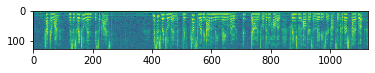

In [21]:
x_ = x.log2()
plt.imshow(x_[0,:,:].detach())

print_values(x_)

### Playing with params

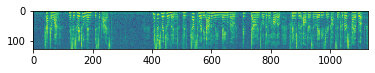

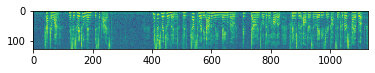

In [22]:
spec1 = MelSpectrogram(sample_rate=8000)
spec2 = MelSpectrogram(sample_rate=16000)

x1 = spec1(waveform).log2()
x2 = spec1(waveform).log2()

plt.imshow(x1[0,:,:].detach())
plt.show()

plt.imshow(x2[0,:,:].detach())
plt.show()

In [23]:
print_values(x1)
print('-'*10)
print_values(x2)

shape: torch.Size([1, 128, 1127])
mean: -9.746004104614258
max: 6.6209869384765625
min: -26.775510787963867
----------
shape: torch.Size([1, 128, 1127])
mean: -9.746004104614258
max: 6.6209869384765625
min: -26.775510787963867


Different sample rate has no effect ?

#### b. n_fft

shape: torch.Size([1, 128, 441])
mean: -4.133031845092773
max: 10.881294250488281
min: -12.77219009399414


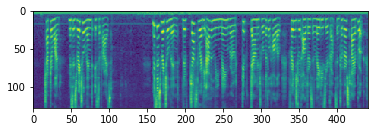

In [28]:
n_fft = 2048
hop_length = 512
spec = MelSpectrogram(n_fft=n_fft, hop_length=hop_length)
x = spec(waveform).log2()
plt.imshow(x[0,:,:].detach())

print_values(x)

Seems quite beautiful. n_fft is basically proportionally to number of bins of frequencies created. So shouldn't the shape of x in vertical direction increase, to some value > 128. And also, why has the horizontal shape decreased ?

Explanation:
    
a. vertical shape remains same, cause after fft, the y axis is scaled according to mel_scale, which has by default 128 values.
    
b. horizontal shape decreases cause, in torchaudio source code, win_length = n_fft. Bigger windows of times leads to smaller horizontal shapes.

#### Normalization

shape: torch.Size([1, 128, 441])
mean: -4.133031845092773
max: 10.881294250488281
min: -12.77219009399414
----------
shape: torch.Size([1, 128, 441])
mean: -6.383044315327879e-09
max: 1.0
min: -0.575394332408905


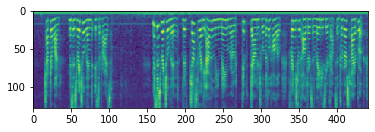

In [68]:
n_fft = 2048
hop_length = 512
spec = MelSpectrogram(n_fft=n_fft, hop_length=hop_length)
with torch.no_grad():
    x = spec(waveform).log2()

X = x - x.mean()
X = X/X.abs().max()


plt.imshow(X[0,:,:].detach())

print_values(x)
print('-'*10)
print_values(X)